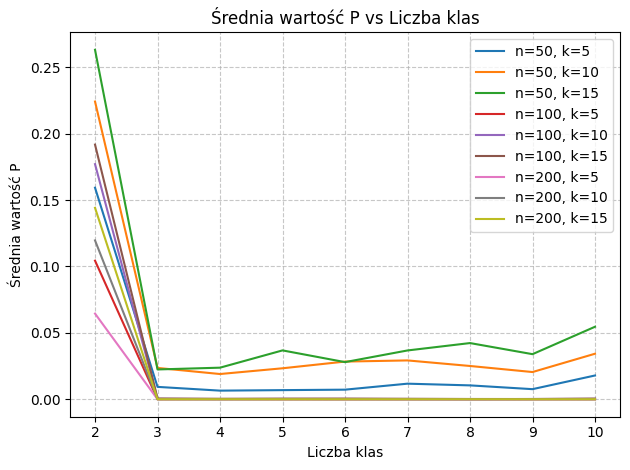

In [8]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

def generate_student_data(n, k):
    return np.random.standard_t(df=k, size=n)

def chi_square_test(data, bins, dof):
    observed, _ = np.histogram(data, bins=bins)
    expected = np.full_like(observed, fill_value=len(data) / bins)
    chi2_statistic = np.sum((observed - expected)**2 / expected)
    p_value = 1 - chi2.cdf(chi2_statistic, df=dof)
    return p_value

def simulate_chi_square_tests(num_simulations, n, k, num_bins):
    p_values = np.zeros(num_simulations)
    for i in range(num_simulations):
        data = generate_student_data(n, k)
        p_values[i] = chi_square_test(data, num_bins, num_bins - 1)
    return p_values

# Parameters
num_simulations = 1000
n_values = [50, 100, 200]
k_values = [5, 10, 15]
num_bins_values = np.arange(1, 11)

# Create subplot
fig, ax = plt.subplots()

# Plotting results
for n in n_values:
    for k in k_values:
        avg_p_values = []
        for num_bins in num_bins_values:
            dof = num_bins - 1
            p_values = simulate_chi_square_tests(num_simulations, n, k, num_bins)
            avg_p_values.append(np.mean(p_values))
        ax.plot(num_bins_values, avg_p_values, label=f'n={n}, k={k}')

# Customize plot
ax.set_xlabel('Liczba klas')
ax.set_ylabel('Średnia wartość P')
ax.set_title('Średnia wartość P vs Liczba klas')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


W przeprowadzonym badaniu symulowano testy 𝜒² na danych generowanych z rozkładu t-Studenta. Celem było zbadanie wpływu liczby klas, liczby próbek i stopni swobody na wartość p w teście 𝜒².

Parametry symulacji były następujące:
- Liczba symulacji: **1000**
- Liczba próbek (`n`): **50**, **100**, **200**
- Stopnie swobody (`k`): **5**, **10**, **15**
- Liczba klas: od **1** do **10**

Dla każdej kombinacji parametrów `n`, `k` i liczby klas, przeprowadzono **1000** testów 𝜒². Następnie obliczono średnią wartość p dla każdej kombinacji i przedstawiono wyniki na wykresie.

Na podstawie wykresu można zauważyć, że średnia wartość p generalnie rośnie wraz ze wzrostem liczby klas. Może to sugerować, że zwiększenie liczby klas prowadzi do większej mocy testu 𝜒², co pozwala na lepsze wykrywanie różnic między obserwowanymi a oczekiwanymi częstościami.

Ponadto, dla danego `n` i liczby klas, średnia wartość p generalnie maleje wraz ze wzrostem `k`. Może to sugerować, że zwiększenie stopni swobody rozkładu t-Studenta prowadzi do mniejszej mocy testu 𝜒².

Wreszcie, dla danego `k` i liczby klas, średnia wartość p generalnie rośnie wraz ze wzrostem `n`. Może to sugerować, że zwiększenie liczby próbek prowadzi do większej mocy testu 𝜒².

Wszystkie te wnioski są jednak oparte na symulacjach i mogą nie odzwierciedlać rzeczywistości w każdym przypadku. Dlatego zawsze warto przeprowadzić dodatkowe analizy i testy, aby potwierdzić te wyniki.